In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Problem Statement 10: (Fix the header)

In [19]:
hospital_data = pd.read_csv('Data/hospitals.csv')
metadata = pd.read_csv('Data/metadata.csv')
hospital_data.head(5)

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [20]:
metadata

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [21]:
hospital_data.columns = ['State/UT', 'Number of Primary Health Centers(PHCs),', 'Community Health Centers(CHCs),', 'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)', 'Hospitals', 'HospitalBeds']
hospital_data.head(5)

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


## Problem Statement 11: (Create a function to alter the data to create uniformity)

In [22]:
def clean_state_names(name):

    name = name.title().replace('&', 'and')
    
    words = name.split()
    camel_case = []
    for word in words:
        if word.lower() == 'and':
            camel_case.append('and')
        else:
            camel_case.append(word.capitalize())

    return ' '.join(camel_case)

hospital_data['State/UT'] = hospital_data['State/UT'].apply(clean_state_names)
hospital_data.head(5)

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [23]:
hospital_data.to_csv("Clean Data/hospitals.csv")
census_data = pd.read_csv('Clean Data/census.csv')

## Problem Statement 12: (Analyze Healthcare facility disparity)

In [24]:
df = hospital_data.merge(census_data, on='State/UT')
df.columns

Index(['State/UT', 'Number of Primary Health Centers(PHCs),',
       'Community Health Centers(CHCs),',
       'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)',
       'Hospitals', 'HospitalBeds', 'District Name', 'Population', 'Male',
       'Female', 'Literate', 'Literate_Male', 'Literate_Female',
       'Households_Rural', 'Households_Urban', 'Households', 'Young_and_Adult',
       'Middle_Aged', 'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')

In [25]:
df = df.dropna(subset=['HospitalBeds', 'Population'])
df = df.fillna(0)

In [26]:
total_beds = df['HospitalBeds'].astype(int)
population = df['Population'].astype(int)

In [29]:
beds_per_10000 = (total_beds / population) * 10000
beds_per_10000

0      338.200966
1      117.995776
2       52.321724
3      224.922071
4      259.328958
          ...    
590    105.490091
591    113.779145
592     62.684691
593     86.519611
594    100.400814
Length: 594, dtype: float64

In [30]:
national_avg = beds_per_10000.sum() / len(beds_per_10000)
national_avg

237.69232176900633

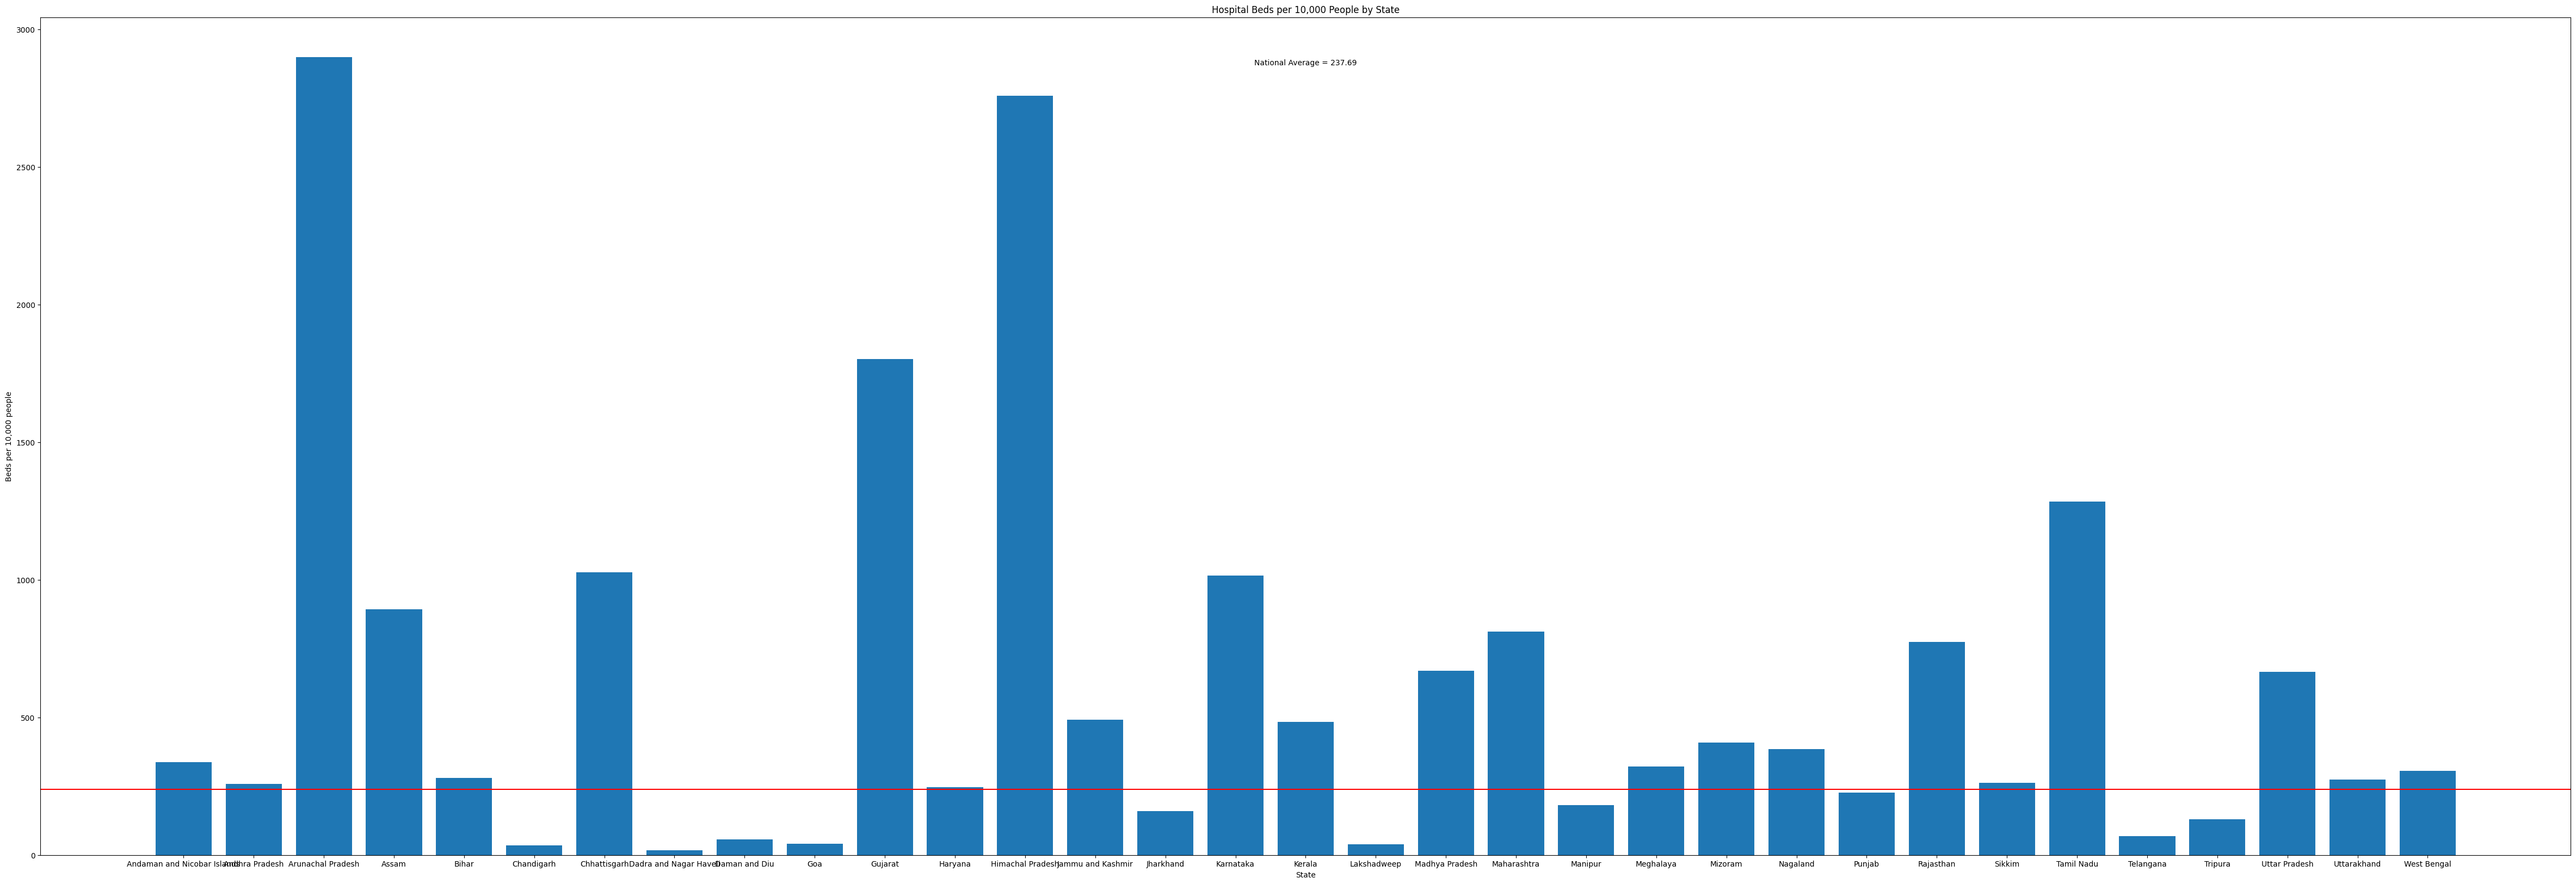

In [49]:
plt.figure(figsize=(60, 20))
plt.bar(df['State/UT'], beds_per_10000)
plt.axhline(y=national_avg, color='r', linestyle='-')
plt.xlabel('State')
plt.ylabel('Beds per 10,000 people') 
plt.title('Hospital Beds per 10,000 People by State')

plt.annotate(f'National Average = {national_avg:.2f}', xy=(0.5, 0.95),  
             xycoords='axes fraction', horizontalalignment='center', 
             verticalalignment='top')

plt.show()